## AI Algorithms I
## Final Project - Task 2

### Submitted by:
### 1. Jasmeet Kaur  (100881373)
### 2. Megha Lal (100855809) 
### 3.Sangeeta Nair (100884883)
### 4. Viviana Lopes (100873273)

#### Using R&D the DS Team must suggest an approach to the forecasting death rate:

####  What kind of information must be collected (features) to support the death forecast, the team can select one of the Top5 countries resulting from the previous step?

We believe COVID-19 patient biomarker information helps to predict the severity of the COVID-19 patients and hence can support death forecast. There is clear evidence of how the levels of biomarkers may change according to severity of COVID-19 infection. This can be used as an adjunct in clinical practice to guide treatment and admission to ICU. By doing so, it may improve prognosis and minimise the mortality rates [1]. Therefore, the biological marker information could not only be used to forecast death rate but also can improve the vaccination efficiency.
The following table shows how biomarkers relate to severity of COVID infection and hence can be used in prediction of mortality rates [1]:

<b>1. Lymphocytes, IL-6, D-dimer, platelet count:  </b>	Compared to non-ICU patients, ICU patients had higher plasma levels of IL-6, D-dimer and platelets. Lymphopenia was more common in ICU patients than non-ICU patients. <br>
<b>2. CRP, WCC: </b> Critically severe patients had significantly higher CRP and WCC than severe or non-severe patients. <br>
<b>3. CRP, D-dimer, LC: </b> The study shows CRP, D-dimer significantly increased but LC decreased for patients does not assess severity. CRP levels compared by ratio to other blood parameters indicated CRP changes prior to others. <br>
<b>4. LDH: </b> LDH measured in COVID-19 positive vs negative patients and higher levels apparent in positive groups. <br>
<b>5. D-dimer, hs-TnI, platelet count: </b>	D-dimer levels >1 μg/mL can help clinicians in identifying patients with poor prognosis at earlier stage. There were significantly higher levels of platelets and hs-TnI in non-survivors compared to survivors <br>

Therefore, we advice to use biomarkers information to see whether we can increase the accuracy of predicting the severity of infection and predict death rates. We would be using the biomarker information as different features and use different Data mining models to compare the performance and give the best model which suits the prediction of mortality or death rate of the COVID-19 patients.

[1]: Muhammed Ker, The role of biomarkers in diagnosis of COVID-19 – A-systematic review, May 2020Life Sciences 254:117788,
DOI: 10.1016/j.lfs.2020.117788

####  Simulate this approach using fictitious or real datasets available on the web.

## 1. Business Problem
The occurrence an increase of COVID-19 cases has put a high pressure on health-care services worldwide. At the current stage, fast, accurate and early clinical assessment of the disease severity is vital. To support decision making and logistical planning in healthcare systems, this study leverages a database of blood samples from 485 infected patients in the region of **United States of America** to identify crucial predictive biomarkers of disease mortality. For this purpose, machine learning tools and models will be used to select the biomarkers that predict the mortality/ death rate of individual patients with high accuracy. Overall, our aim is to suggest a simple and operable decision rule to quickly predict patients at the highest risk, allowing them to be prioritised and potentially reducing the mortality rate.

## 2. Importing required modules

In [50]:
!pip install sweetviz
import sweetviz as sv
import numpy as np 
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor

## 2. Data Cleaning

Import dataset as excel file and store in patient_data_set

In [51]:
patient_data_set= pd.read_excel('time_series_375_prerpocess_en.xlsx')  

Display first five records of imported dataset.

In [52]:
patient_data_set.head(5)

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we see some patient_id values are NaN.

Check columns of imported dataset.

In [53]:
patient_data_set.columns

Index(['PATIENT_ID', 'RE_DATE', 'age', 'gender', 'Admission time',
       'Discharge time', 'outcome', 'Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase',
       'albumin', 'basophil(%)', 'Interleukin 10', 'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8',
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count'

Check datatypes of each column in imported dataset.

In [54]:
patient_data_set.dtypes

PATIENT_ID                              float64
RE_DATE                          datetime64[ns]
age                                       int64
gender                                    int64
Admission time                   datetime64[ns]
                                      ...      
thrombocytocrit                         float64
ESR                                     float64
glutamic-pyruvic transaminase           float64
eGFR                                    float64
creatinine                              float64
Length: 81, dtype: object

In [55]:
patient_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 81 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     375 non-null    float64       
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

Just describe the datset to see statistical values

In [56]:
patient_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PATIENT_ID,375.0,188.000000,108.397417,1.00,94.500,188.00,281.500,375.00
age,6120.0,59.443301,16.372234,18.00,47.000,62.00,71.000,95.00
gender,6120.0,1.390523,0.487907,1.00,1.000,1.00,2.000,2.00
outcome,6120.0,0.474673,0.499399,0.00,0.000,0.00,1.000,1.00
Hypersensitive cardiac troponinI,507.0,1223.229980,5391.612529,1.90,4.400,20.60,223.750,50000.00
...,...,...,...,...,...,...,...,...
thrombocytocrit,862.0,0.212309,0.092841,0.01,0.150,0.21,0.270,0.51
ESR,383.0,33.689295,24.603453,1.00,14.000,28.00,45.500,110.00
glutamic-pyruvic transaminase,931.0,38.860365,83.766636,5.00,16.000,24.00,41.000,1600.00
eGFR,936.0,81.564316,32.222775,2.00,63.575,87.90,103.975,224.00


One patient has different values but only first row has patient id and others are NaN so in order to have all rows with same patient id we will use preceeding values.

In [57]:
patient_data_set['PATIENT_ID'] = patient_data_set['PATIENT_ID'].fillna(method = 'ffill')

Display the data set again to verify patient id

In [58]:
patient_data_set

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,1.0,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,1.0,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,375.0,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,375.0,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,375.0,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,375.0,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choose most recent value for patient with different values.Group the patient id w.r.t admission time and select last row.
This way, we consider last visit of every patient.

In [59]:
sorted_patient_data = patient_data_set.sort_values('RE_DATE').groupby('PATIENT_ID').tail(1)
most_recent_patient_data = sorted_patient_data.sort_values('PATIENT_ID')
most_recent_patient_data.head()

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
23,1.0,2020-02-17 08:31:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2.0,2020-02-17 15:34:00,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,NaN,NaN,NaN,...,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,3.0,2020-02-06 23:15:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,4.0,2020-02-17 08:31:00,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,5.0,2020-02-18 09:35:00,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,NaN,130.0,NaN,...,30.0,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN


For all the columns that have NaN values we are replacing them by median value

In [60]:
most_recent_patient_data = most_recent_patient_data.fillna(most_recent_patient_data.median())

C:\Users\Viviana Lopes\AppData\Local\Temp\ipykernel_26164\3865067195.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Display the dataset again and we see most of the NaN values are now having some median value.

In [61]:
most_recent_patient_data

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
23,1.0,2020-02-17 08:31:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,136.75,123.0,102.2,...,30.4,36.85,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
52,2.0,2020-02-17 15:34:00,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,136.75,123.0,102.2,...,30.4,36.00,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
70,3.0,2020-02-06 23:15:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,136.75,123.0,102.2,...,30.4,36.85,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
84,4.0,2020-02-17 08:31:00,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,136.75,123.0,102.2,...,30.4,36.85,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
105,5.0,2020-02-18 09:35:00,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,136.75,130.0,102.2,...,30.0,36.85,57.3,0.15,141.0,0.360,40.5,29.0,64.55,117.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,371.0,2020-02-06 12:14:00,63,1,2020-02-04 11:51:01,2020-02-05 19:58:05,1,136.75,123.0,102.2,...,30.4,36.85,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
6076,372.0,2020-02-15 08:05:00,79,1,2020-02-05 17:52:06,2020-02-16 10:45:40,1,136.75,102.0,102.2,...,30.4,36.85,57.3,0.15,141.0,0.070,40.5,29.0,64.55,117.5
6082,373.0,2020-02-12 15:24:00,61,2,2020-02-12 03:07:48,2020-02-14 18:47:23,1,136.75,123.0,102.2,...,30.4,36.70,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5
6095,374.0,2020-02-06 15:41:00,33,1,2020-02-03 22:16:30,2020-02-08 10:47:24,1,136.75,123.0,128.2,...,30.4,36.85,61.7,0.15,164.7,0.165,40.5,1508.0,69.40,118.0


Check if any column still has null records.

In [62]:
most_recent_patient_data.isna().sum()


PATIENT_ID                        0
RE_DATE                          14
age                               0
gender                            0
Admission time                    0
                                 ..
thrombocytocrit                   0
ESR                               0
glutamic-pyruvic transaminase     0
eGFR                              0
creatinine                        0
Length: 81, dtype: int64

So RE_DATE column still has null values.

We will drop the rows that have no data for RE_DATE.

In [63]:
data_set = most_recent_patient_data.dropna()

Check if there are still any duplicate records in our data

In [64]:
duplicate = most_recent_patient_data[most_recent_patient_data.duplicated()]
print("Number of Duplicate records :")
print(duplicate.count())

Number of Duplicate records :
PATIENT_ID                       0
RE_DATE                          0
age                              0
gender                           0
Admission time                   0
                                ..
thrombocytocrit                  0
ESR                              0
glutamic-pyruvic transaminase    0
eGFR                             0
creatinine                       0
Length: 81, dtype: int64


Now our dataframe is ready for analysis as we have removed all NaN values.

data_set is the dataframe on which we will proceed with further analysis.

## 3. Exploratory Data Analysis

Check count of each outcome

In [65]:
data_set['outcome'].value_counts()

0    195
1    166
Name: outcome, dtype: int64

Creating new data frame data_Analysis for doing visualization

In [66]:
data_Analysis = data_set

Calculate  time spent in hospital

In [67]:
data_Analysis["time_in_hospital"] = (data_Analysis['Discharge time']- data_Analysis['Admission time']).dt.total_seconds()/(86400.0)

Calculate average time spent in hospital agewise

In [68]:
grouped_result_df = data_Analysis.groupby(['age'], as_index = False)['time_in_hospital'].mean()
grouped_result_df

,age,time_in_hospital
0,18,14.634606
1,19,2.706817
2,22,14.748368
3,26,9.595347
4,27,12.734443
...,...,...
65,90,8.203738
66,91,4.711968
67,92,4.446134
68,94,4.771678


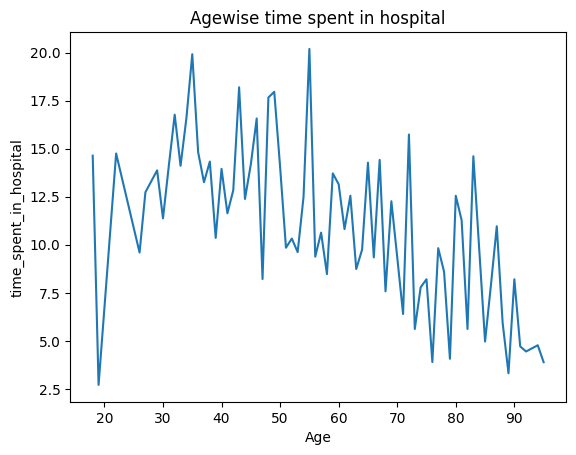

In [69]:
x_axis = grouped_result_df['age']
y_axis = grouped_result_df['time_in_hospital']
plt.plot(x_axis, y_axis)
plt.title('Agewise time spent in hospital')
plt.xlabel('Age')
plt.ylabel('time_spent_in_hospital')
plt.show()


As we can see from above chart, patient from age group 50-60 has spent maximum time in hospital.

In [70]:
data_Analysis['gender'].unique()

array([1, 2], dtype=int64)

In [71]:
data_Analysis[data_Analysis['age']==18]

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine,time_in_hospital
2612,157.0,2020-02-15 09:48:00,18,2,2020-02-02 20:27:24,2020-02-17 11:41:14,0,136.75,123.0,102.2,...,36.85,57.3,0.15,141.0,0.165,40.5,29.0,64.55,117.5,14.634606


Assuming gender = 1 as 'Female' and  gender = 2 as 'Male'

In [72]:
data_Analysis['sex'] = data_Analysis['gender']
data_Analysis['sex'] = data_Analysis['sex'].replace(1, 'Female')
data_Analysis['sex'] = data_Analysis['sex'].replace(2, 'Male')

In [73]:
data_Analysis['outcome1'] = data_Analysis['outcome']
data_Analysis['outcome1'] = data_Analysis['outcome1'].replace(0, 'Alive')
data_Analysis['outcome1'] = data_Analysis['outcome1'].replace(1, 'Death')

Plot age histogram

<AxesSubplot: >

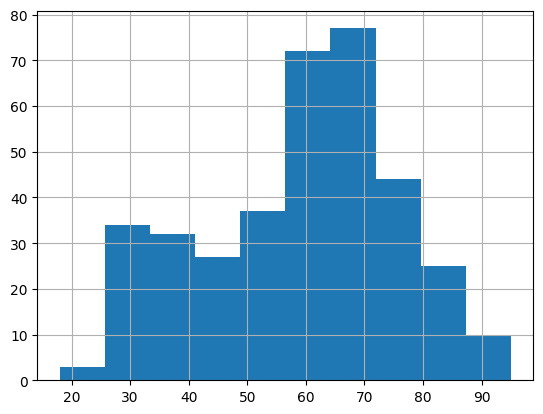

In [74]:
data_Analysis['age'].hist(bins=10)

The dataset contains maximum patients from age bracket 55 to 72 years.

Plot boxplot for age

<AxesSubplot: >

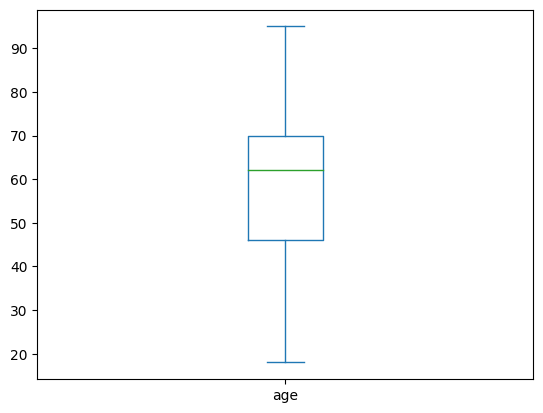

In [75]:
data_Analysis.age.plot(kind='box')

It is clear that 65 years is the median age group of patients in the data under consideration

Plot countplot for gender

<AxesSubplot: xlabel='sex', ylabel='count'>

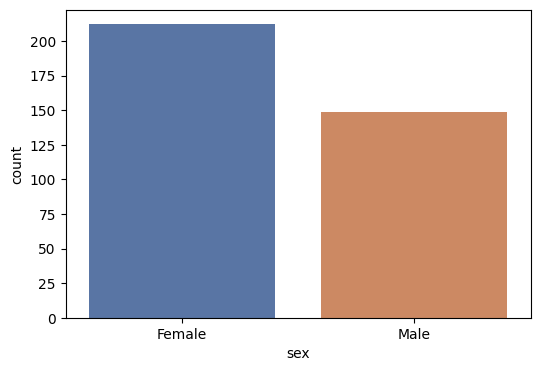

In [76]:
plt.figure(figsize=(6,4))
#ax = sns.countplot(df['SEX'], palette='deep')
sns.countplot(x ='sex', data = data_Analysis, palette='deep')

It is clear from above chart that female patients are more than male

Plot count plot for death and alive patient.

<AxesSubplot: xlabel='outcome1', ylabel='count'>

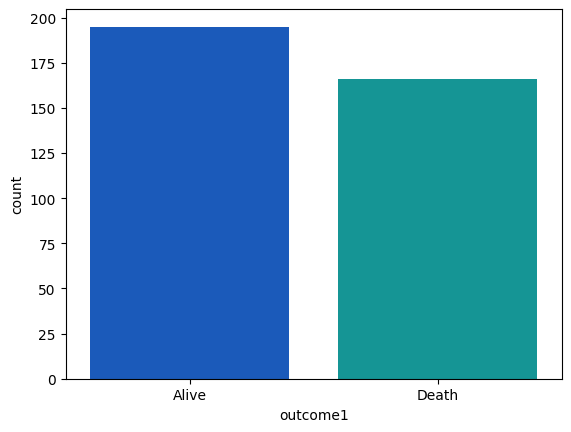

In [77]:
sns.countplot(x ='outcome1', data = data_Analysis,palette='winter')

Plot box plot for alive and died patients as per age and gender

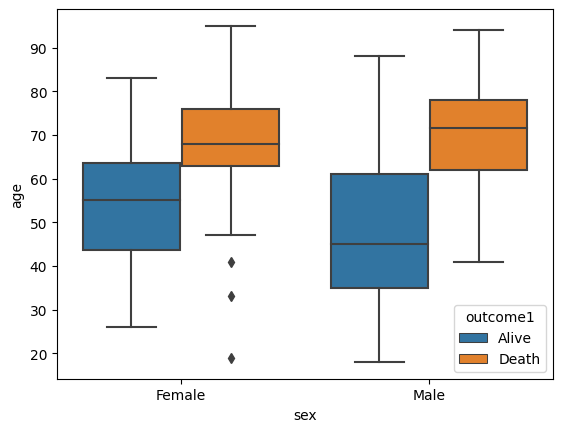

In [78]:
sns.boxplot(y='age', x='sex', data=data_Analysis, hue='outcome1')
plt.show()

It is clear from above boxplot that deaths are more from age group 65 in both male and female.

Swarm plot for alive and died patients as per gender.

<AxesSubplot: xlabel='outcome1', ylabel='age'>

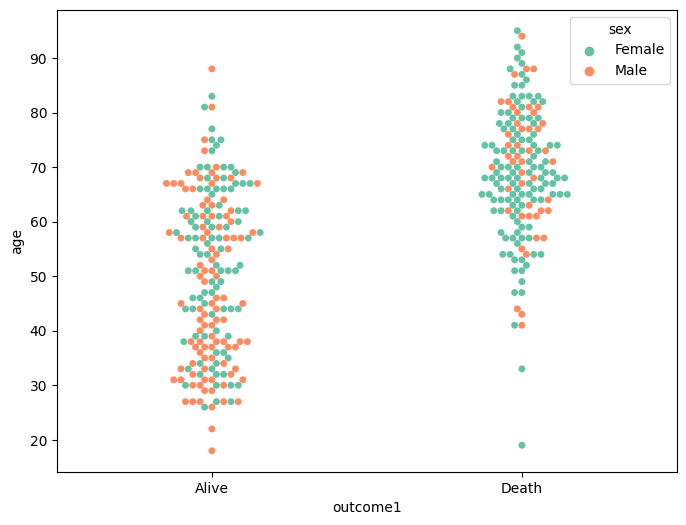

In [79]:
plt.figure(figsize=(8,6))

sns.swarmplot(x='outcome1',y='age',data=data_Analysis,hue='sex', palette='Set2')

It is seen from above chart that, overall more deaths are observed after age 60 years for female.

Below is the logic to calculate percentage of patient died or survived as per age.

In [80]:
totalCount_byAge = data_Analysis.groupby(['age'], as_index = False)['outcome'].count()
outcome_byAge = data_Analysis.groupby(['age'], as_index = False)['outcome'].sum()
fatalitiesbyAge=outcome_byAge
fatalitiesbyAge['NoDeaths'] = totalCount_byAge['outcome'] - outcome_byAge['outcome']
fatalitiesbyAge['Total'] = totalCount_byAge['outcome']

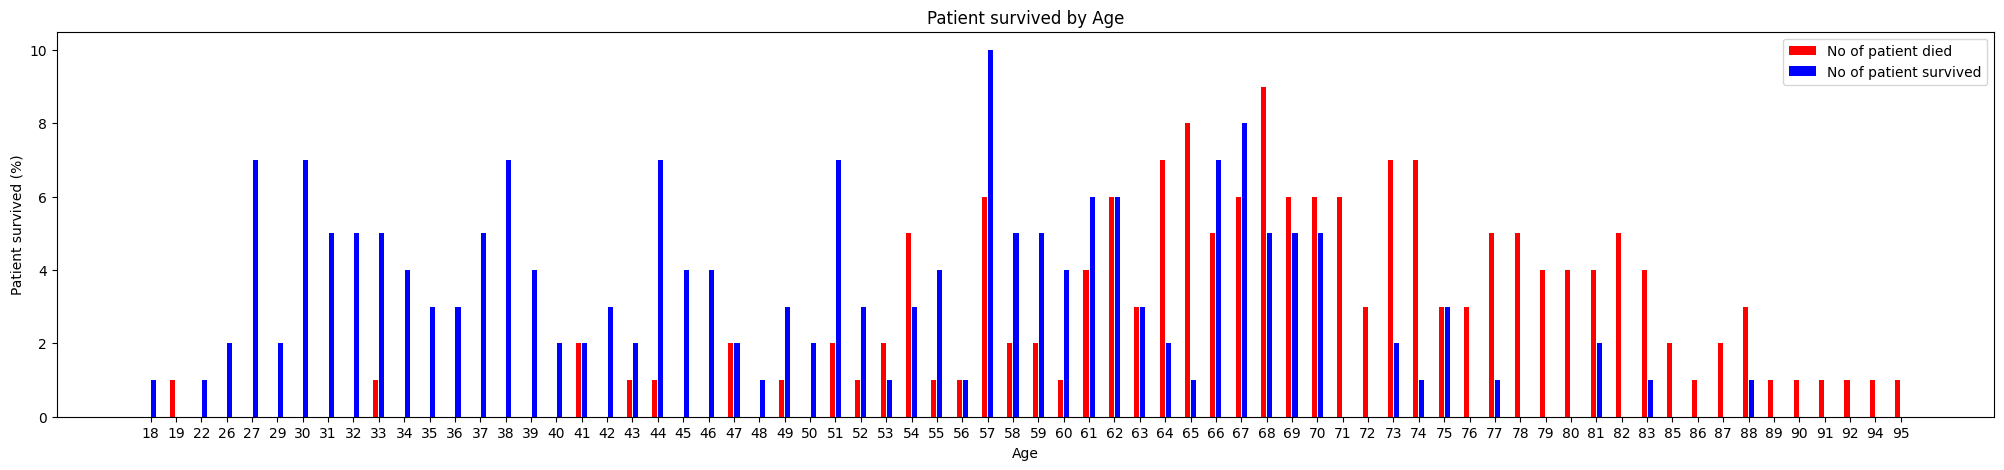

In [81]:
X_axis = np.arange(len(fatalitiesbyAge['age']))
fig = plt.figure(figsize = (25, 5))
width = 0.22
plt.bar(X_axis-0.12, fatalitiesbyAge['outcome'], width-0.02, label = 'No of patient died', color='r')
plt.bar(X_axis+0.12, fatalitiesbyAge['NoDeaths'], width-0.02, label = 'No of patient survived', color='b')
plt.xticks(X_axis, fatalitiesbyAge['age'])
plt.xlabel("Age")
plt.ylabel("Patient survived (%)")
plt.title("Patient survived by Age")
plt.legend()
plt.show()

It is clear from above chart that most of the deaths are recorded from age 65 to 95.

Scatter plot for time spent in hospital agewise.

<AxesSubplot: xlabel='age', ylabel='time_in_hospital'>

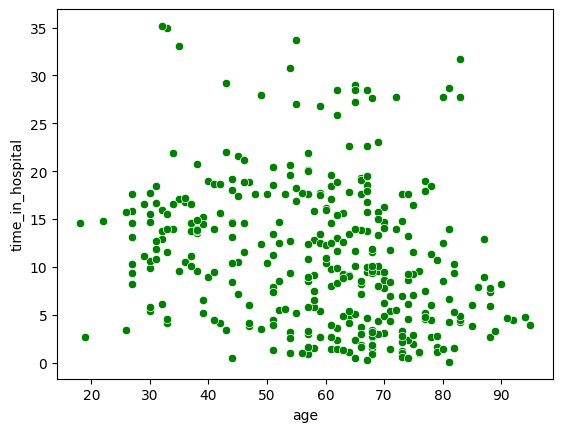

In [82]:
sns.scatterplot(data=data_Analysis,x="age",y="time_in_hospital",color="g")

It is clear from above chart that around age group 55-75 more patients get admitted in hospital.

Plot heat map

C:\Users\Viviana Lopes\AppData\Local\Temp\ipykernel_26164\568233980.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

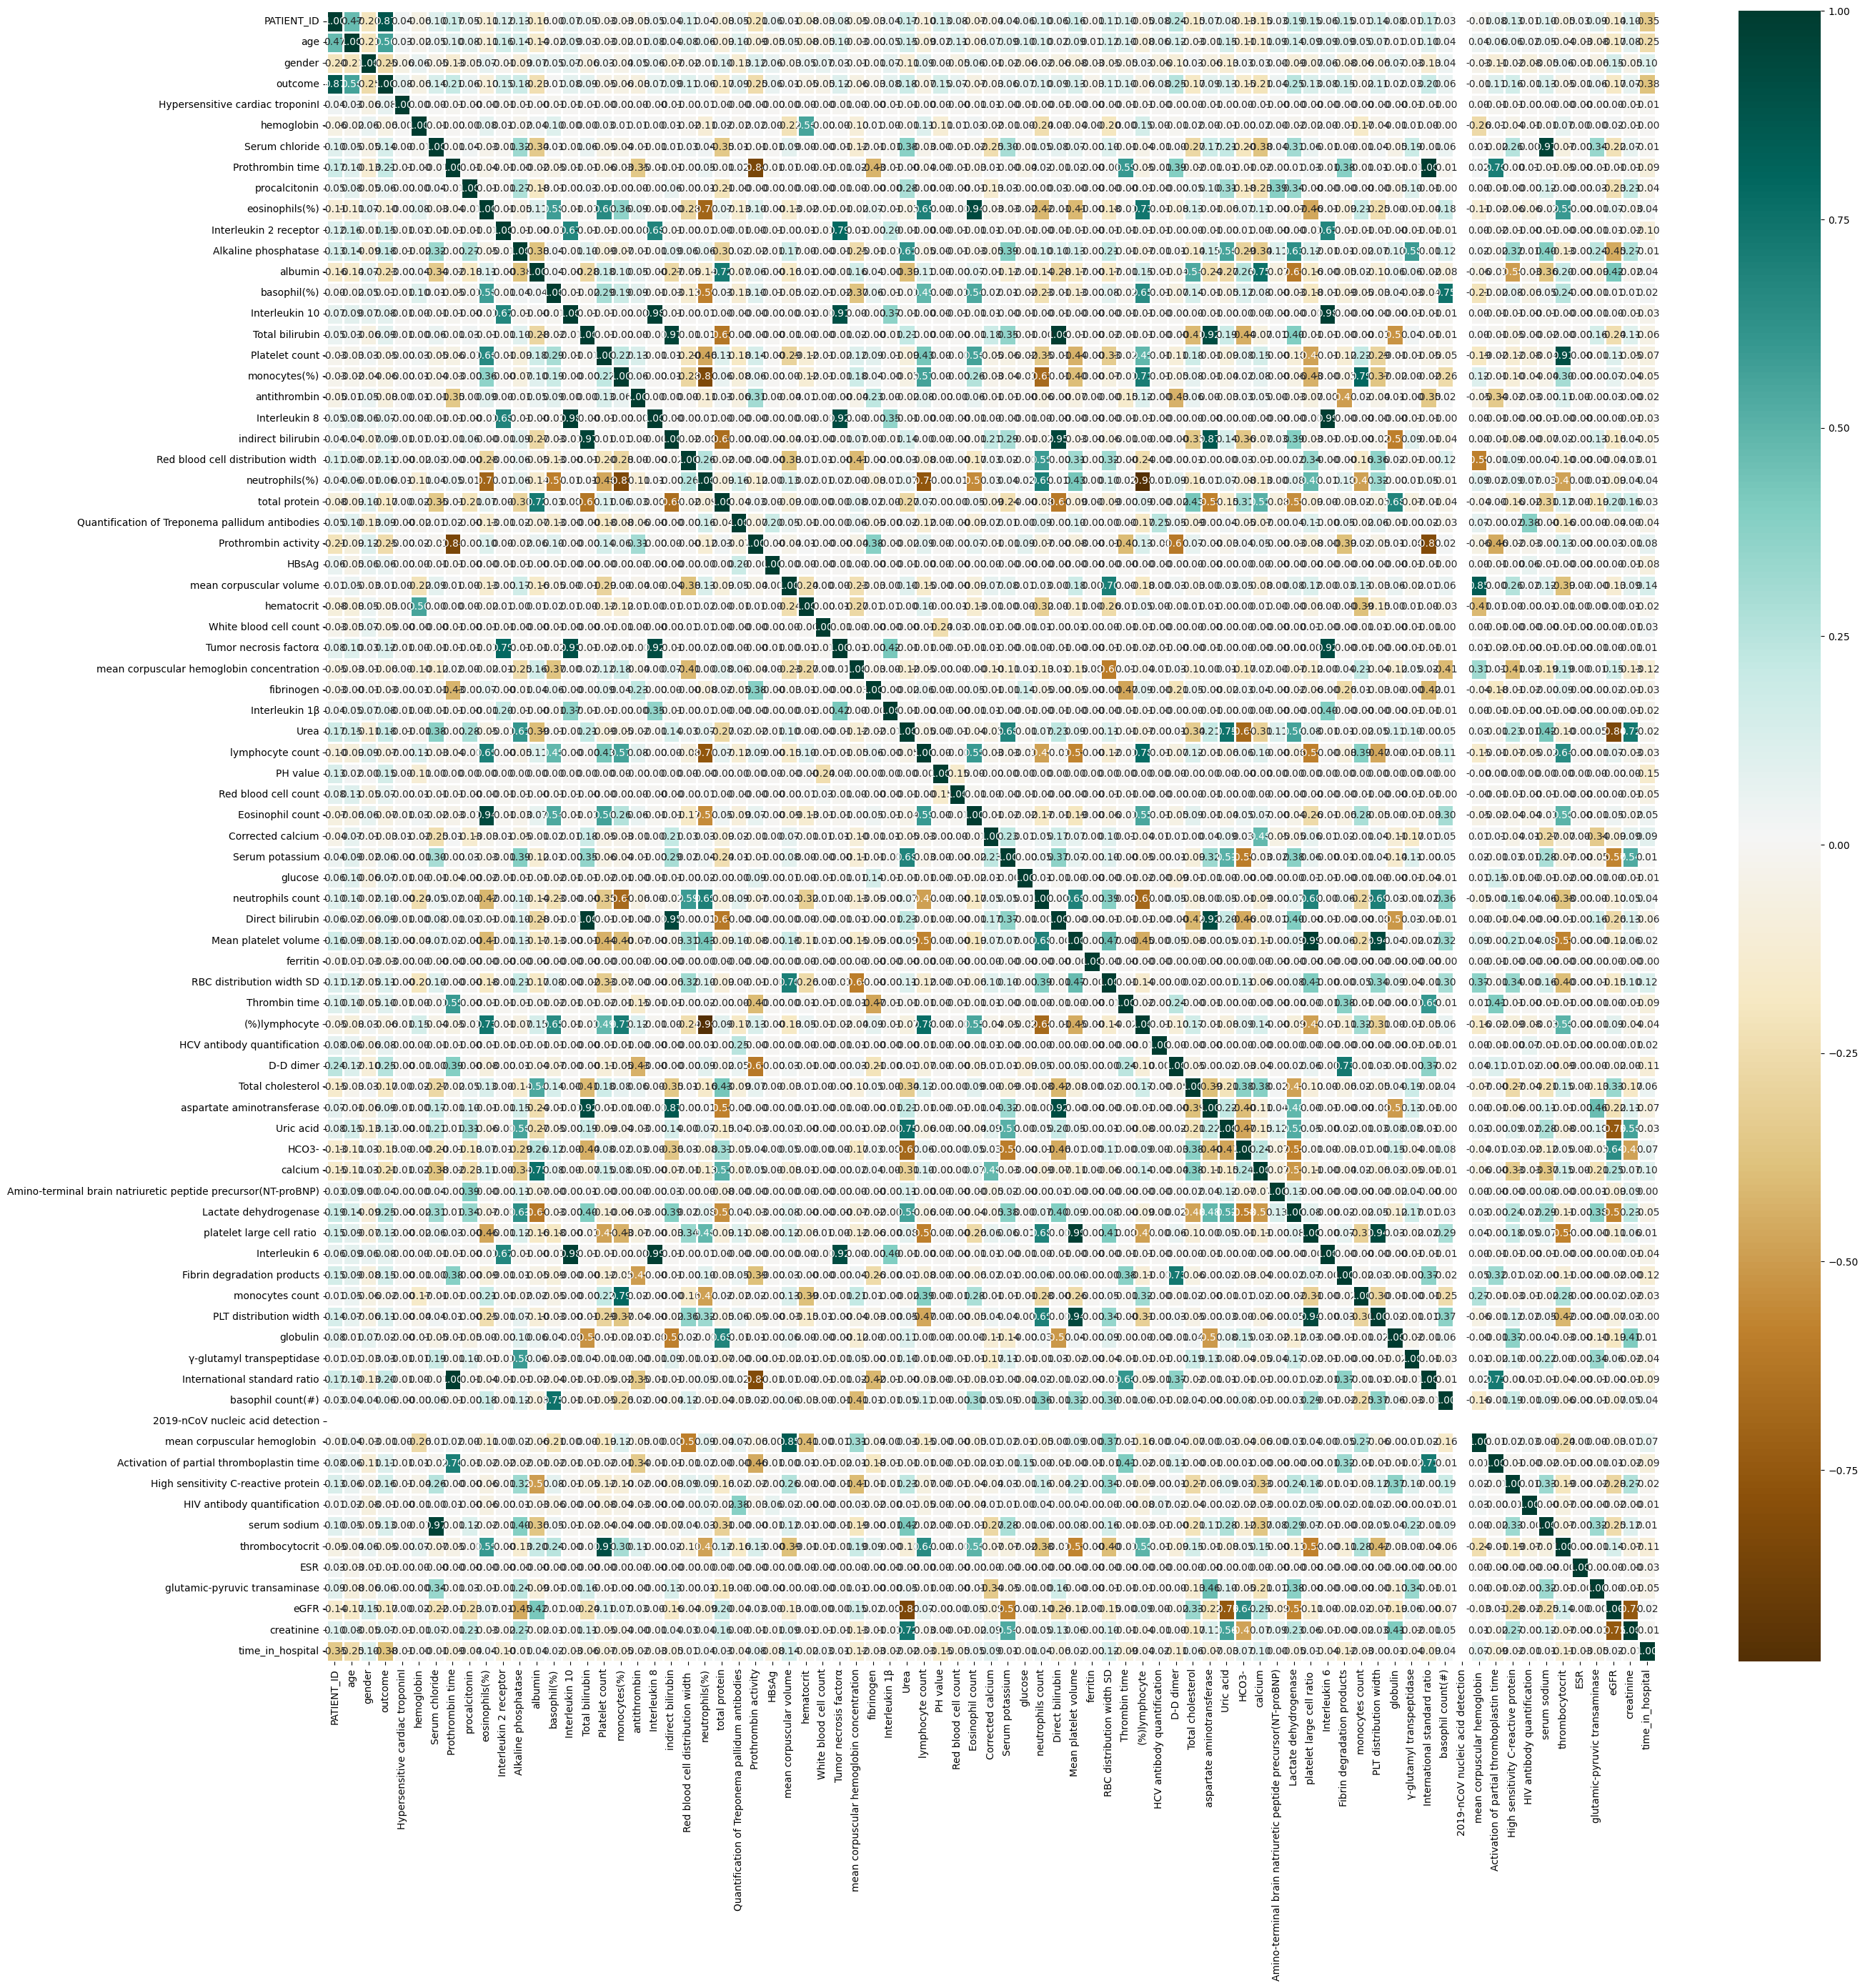

In [83]:
plt.figure(figsize=(30 , 30))
sns.heatmap(data_Analysis.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

There are many features in this dataset and as we can see very few features show strong correlation. Hence we will use principal component analysis technique to reduce dimensions.

## 4. Feature Engineering by PCA for dimensionality reduction

In [84]:
X_features = most_recent_patient_data.drop(['outcome', 'RE_DATE', 'Admission time', 'Discharge time'], axis=1).to_numpy()
y = most_recent_patient_data['outcome'].to_numpy()

In [85]:
pca = PCA(n_components=10)
pca.fit(X_features)
X = pca.transform(X_features)

In [86]:
X

array([[  -8.80535182,  -81.10465536,  -52.11846118, ...,    7.91347436,
         -35.86343615,    3.64444804],
       [  -8.80881706,  -81.10698496,  -52.14877926, ...,    7.75925586,
         -35.72727881,    4.07858139],
       [  -8.80504047,  -81.09992585,  -52.0914384 , ...,    7.84657008,
         -35.57328403,    3.66300036],
       ...,
       [  -8.55929335,  -79.97313257,  -44.8396577 , ...,   -1.29845292,
          13.90093407,   -9.23202974],
       [  -1.21522662,  -81.03806929,  -48.4681    , ..., -389.25535969,
         394.93578833,  952.99638828],
       [  -8.55553488,  -79.96382514,  -44.77106373, ...,   -1.27915023,
          14.15916356,   -9.56589283]])

In [87]:
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Label'])
df

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Label
0,-8.805352,-81.104655,-52.118461,-23.416407,-37.617265,-126.364028,123.354737,7.913474,-35.863436,3.644448,0.0
1,-8.808817,-81.106985,-52.148779,-23.471454,-37.725032,-126.969302,123.821405,7.759256,-35.727279,4.078581,0.0
2,-8.805040,-81.099926,-52.091438,-23.347731,-37.358788,-125.207459,122.049955,7.846570,-35.573284,3.663000,0.0
3,-8.802989,-81.095033,-52.055226,-23.269057,-37.161924,-124.329270,121.167332,7.845888,-35.470392,3.507632,0.0
4,-8.818076,-81.137063,-52.299842,-23.573822,-40.818521,-128.172379,120.687104,1.354608,-34.683044,4.744434,0.0
...,...,...,...,...,...,...,...,...,...,...,...
370,-8.565354,-80.755723,179.165092,17.255379,16.621281,115.794826,-139.166533,-1.176044,13.522954,-9.588735,1.0
371,-8.553746,-79.967436,-44.784600,-6.174784,17.975773,118.586442,-141.117803,11.616858,24.392754,-9.740819,1.0
372,-8.559293,-79.973133,-44.839658,-6.234963,17.166234,118.456622,-142.104279,-1.298453,13.900934,-9.232030,1.0
373,-1.215227,-81.038069,-48.468100,-9.644775,1564.792235,-514.699563,-375.070848,-389.255360,394.935788,952.996388,1.0


## 5. Machine Learning Models

#### spliting the dataset into Train and Test sets

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(262, 10)


In [89]:
# Creating Model array to store the classifiers
models = []

models.append(('Decision Tree Classifier (DT)', DecisionTreeClassifier()))
models.append(('SVM Classifier (SVM)', SVC()))
models.append(('Random Forest Classifier (RF)', RandomForestClassifier()))

In [90]:
# Displaying scores of models
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

                            Name     Score
0  Decision Tree Classifier (DT)  0.991150
1           SVM Classifier (SVM)  0.557522
2  Random Forest Classifier (RF)  0.991150


<b>Conclusion:</b> <br>
From all the models trained and tested above, Decision Tree gives us the best accuracy.

## 6. Cross Validation

Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

#### 6.1 Cross Validation using Stratified Sampling
The dataset was stratified in order to preserve the proportion of target as in the original dataset, in the train and test datasets as well. At first we will stratify the label feature. Cross-validation implemented using stratified sampling ensures that the proportion of the feature of interest is the same across the original data, training set and the test set. This ensures that no value is over/under-represented in the training and test sets, which gives a more accurate estimate of performance/error.

In [91]:
# Train Test Split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, stratify = df.Label, random_state=0)

In [92]:
# Creating Model array to store the classifiers
models = []

models.append(('Decision Tree Classifier (DT)', DecisionTreeClassifier()))
models.append(('SVM Classifier (SVM)', SVC()))
models.append(('Random Forest Classifier (RF)', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))

In [93]:
# Displaying scores of models
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

                            Name     Score
0  Decision Tree Classifier (DT)  0.978723
1           SVM Classifier (SVM)  0.563830
2  Random Forest Classifier (RF)  0.989362


#### 6.2 Cross Validation using K fold Stratification

In [94]:
# Dividing data into ten blocks, for 10-fold cross-validation.
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

# Displaying scores of models after 10-fold cross-validation
names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

                            Name     Score
0  Decision Tree Classifier (DT)  0.989331
1           SVM Classifier (SVM)  0.610669
2  Random Forest Classifier (RF)  0.983926


#### 6.3 Plotting the cross validation scores of the machine learning algorithms

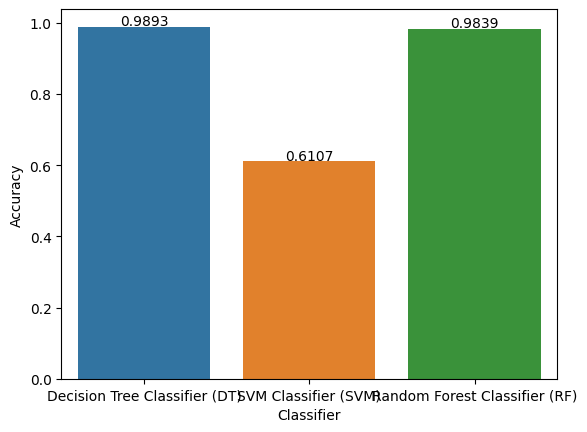

In [95]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

##### Conclusion:
Before cross validation, Decision Tree classifier gave the highest accuracy of about 1.00. After cross validation we can see that Decision tree and Random Forest models have high accuracy of 0.98. Therefore, Decision Tree and Random Forest classifier can be used to predict mortality rate/death rate from the given selected set of features.

## 7. Summary and Conclusion
By using different biomarkers the mortality/death rate can be predicted with higher accuracy. The accuracy was found using different data mining models. From cross validation we can say that random forest algorithm and Decision tree has worked well for the given dataset with an accuracy of 98%. 